# Analysis of results from different locations

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

## Figure out missing qries

In [91]:
rbo_score = pd.read_csv("../data/house_analysis/home_random_dist_rbo_similarity_clean_locid.csv")

In [92]:
qrys = rbo_score['qry'].unique()

In [93]:
len(qrys)

417

In [94]:
all_qry_df = pd.read_csv("../data/qry_info_house_filter.csv")

In [95]:
all_qry = all_qry_df['qry'].unique()

In [96]:
len(all_qry)

417

In [97]:
missing_qry = set(all_qry) - set(qrys)

In [98]:
missing_qry

set()

In [99]:
missing_qry_info = all_qry_df[all_qry_df['qry'].isin(missing_qry)]

In [100]:
missing_qry_info

,Unnamed: 0,qry,qry_clean,governor,congress,candidate,state,district,party,chamber,date_started_position,full_term,relevance_score,in_data,house_analysis_include


In [101]:
qry_loc_checkhome = pd.read_csv('../data/house_analysis/qry_loc_checkhome.csv')

In [102]:
len(qry_loc_checkhome['qry'].unique())

417

In [103]:
missing_qry_checkhome = qry_loc_checkhome[qry_loc_checkhome['qry'].isin(missing_qry)]

In [104]:
missing_qry_checkhome[(missing_qry_checkhome['qry']== 'Liz Cheney')&(missing_qry_checkhome['srch_state']=='WY')]

,qry,loc_id,loc_id_clean,srch_state,srch_district,party,home_state,home_district,is_home_state,is_home_district


## Combine missing and current

In [56]:
rbo_score_missing = pd.read_csv("../data/house_analysis/home_random_dist_rbo_similarity_clean_locid_just_missing.csv")

In [58]:
rbo_score_full = pd.concat([rbo_score_missing, rbo_score])

In [60]:
rbo_score_full.to_csv("../data/house_analysis/home_random_dist_rbo_similarity_clean_locid.csv", index=False)

## Analysis of score

In [105]:
rbo_score

,crawl_id,qry,home_dist,random_dist,home_result_length,random_dist_result_length,rbo_similarity
0,20201007,Brad Wenstrup,OH-2,FL-10,15,15,1
1,20201215,Brad Wenstrup,OH-2,CO-3,15,15,1
2,20201211,Brad Wenstrup,OH-2,OR-5,14,14,1
3,20201014,Brad Wenstrup,OH-2,PA-10,18,18,1
4,20200921,Brad Wenstrup,OH-2,CA-51,15,15,1
...,...,...,...,...,...,...,...
4165,20201112,Frank Lucas,OK-3,OK-4,16,16,1
4166,20201222,Frank Lucas,OK-3,PA-6,13,13,1
4167,20201221,Frank Lucas,OK-3,CA-44,13,13,1
4168,20201125,Frank Lucas,OK-3,OH-2,17,17,1


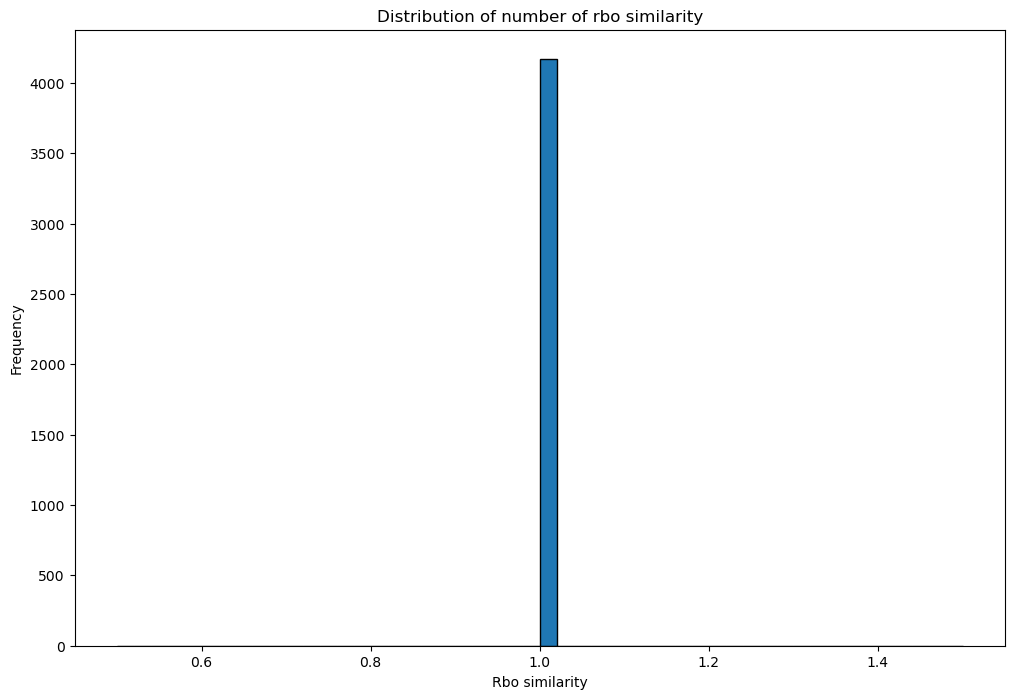

In [106]:
fig = plt.figure(figsize = (12, 8))

plt.hist(rbo_score['rbo_similarity'], edgecolor='black', bins=50)
# plt.xticks(rotation='vertical')
 
plt.xlabel("Rbo similarity")
plt.ylabel("Frequency")
plt.title("Distribution of number of rbo similarity")
plt.savefig("../data/plots/loc_rbo_similarity.png", bbox_inches='tight', dpi=200) 
plt.show()